In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [49]:
df = pd.read_csv('1992_Calculations_Subset.txt')

# Drop any NaNs
df = df[np.isfinite(df['CIN'])]
df = df[np.isfinite(df['CIN_Tv'])]
df = df[df['CIN_Tv']<0]

In [50]:
df.head()

,Unnamed: 0,CAPE,CAPE_Tv,CIN,CIN_Tv,Date,Station,Time
0,0,27.245569,25.344036,-21.312181,-3.749632,1992-05-01,ABQ,0
1,1,0.000000,0.000000,-29.935809,-6.389888,1992-05-01,ALB,0
2,2,211.772549,240.710300,-361.946229,-262.137353,1992-05-01,BIS,0
5,5,862.684105,969.766426,-174.736313,-56.710267,1992-05-01,BRO,0
7,7,0.000000,1.820628,-78.214320,-52.107253,1992-05-01,CAR,0


In [51]:
# Calculate the absolute difference between corrected and uncorrected CAPE/CIN values
df['CAPE_Abs_Difference'] = df['CAPE_Tv'] - df['CAPE']
df['CIN_Abs_Difference'] = df['CIN_Tv'] - df['CIN']

# Calculate the relative difference between corrected and uncorrected CAPE/CIN values
df['CAPE_Rel_Difference'] = df['CAPE_Abs_Difference'] / df['CAPE_Tv']
df['CIN_Rel_Difference'] = df['CIN_Abs_Difference'] / df['CIN_Tv']

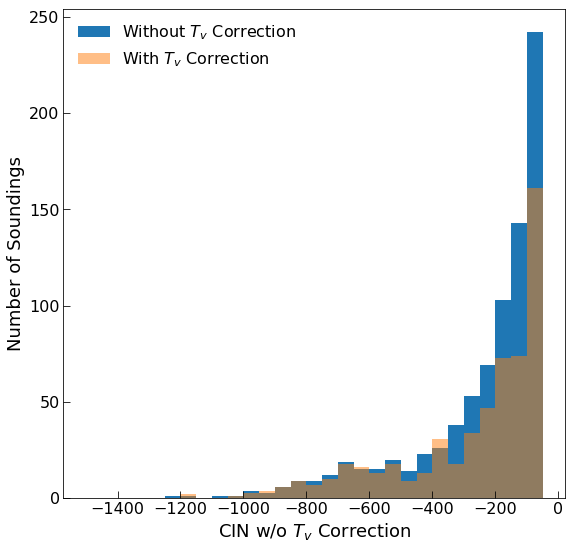

In [52]:
# Cape Histogram
# Setup figure and axes
fig = plt.figure(figsize=(9, 9))
ax1 = plt.subplot(111)

# Set labels and tick sizes
ax1.set_xlabel('CIN w/o $T_v$ Correction', fontsize=18)
ax1.set_ylabel(r'Number of Soundings', fontsize=18)

# Turn up label sizes
ax1.tick_params(axis='both', which='major', labelsize=16)
ax1.tick_params(axis='both', which='minor', labelsize=12)

# Make ticks interior and large
ax1.tick_params(direction='in', length=7)

# Plotting
bin_edges = np.arange(-1500, 0, 50)
ax1.hist(np.array(df['CIN']), bins=bin_edges, alpha=1, label='Without $T_v$ Correction')
ax1.hist(np.array(df['CIN_Tv']), bins=bin_edges, alpha=0.5, label='With $T_v$ Correction')
plt.legend(fontsize=16, frameon=False)

# Set limits
#ax1.set_xlim(0,200)
#ax1.set_ylim(0,200)

plt.savefig('../Plots/1992_CIN_Histogram.png', bbox_inches='tight', dpi=300);  

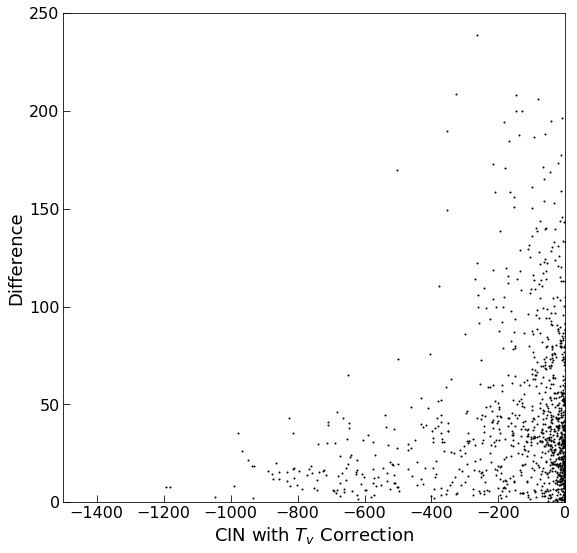

In [53]:
# Cape Histogram
# Setup figure and axes
fig = plt.figure(figsize=(9, 9))
ax1 = plt.subplot(111)

# Set labels and tick sizes
ax1.set_xlabel('CIN with $T_v$ Correction', fontsize=18)
ax1.set_ylabel(r'Difference', fontsize=18)

# Turn up label sizes
ax1.tick_params(axis='both', which='major', labelsize=16)
ax1.tick_params(axis='both', which='minor', labelsize=12)

# Make ticks interior and large
ax1.tick_params(direction='in', length=7)

# Plotting
ax1.plot(df['CIN_Tv'], df['CIN_Abs_Difference'], color='k', linestyle='None', marker='o', markersize=1)

# Set limits
ax1.set_xlim(-1500, 0)
ax1.set_ylim(0, 250)

plt.savefig('../Plots/1992_CIN_Absolute_Difference.png', bbox_inches='tight', dpi=300);  

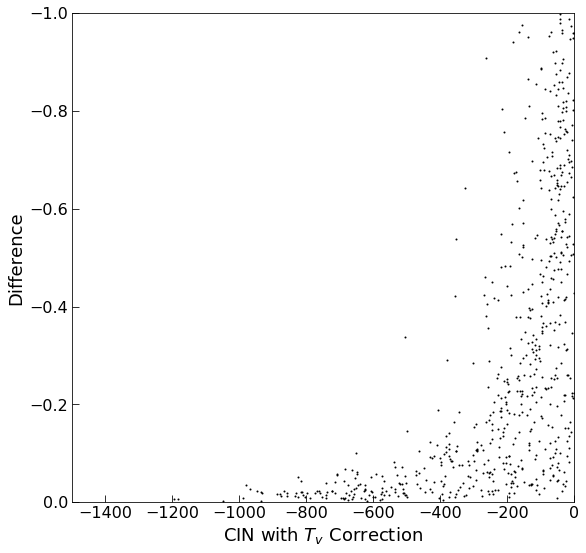

In [54]:
# Cape Histogram
# Setup figure and axes
fig = plt.figure(figsize=(9, 9))
ax1 = plt.subplot(111)

# Set labels and tick sizes
ax1.set_xlabel('CIN with $T_v$ Correction', fontsize=18)
ax1.set_ylabel(r'Difference', fontsize=18)

# Turn up label sizes
ax1.tick_params(axis='both', which='major', labelsize=16)
ax1.tick_params(axis='both', which='minor', labelsize=12)

# Make ticks interior and large
ax1.tick_params(direction='in', length=7)

# Plotting
ax1.plot(df['CIN_Tv'], df['CIN_Rel_Difference'], color='k', linestyle='None', marker='o', markersize=1)

# Set limits
ax1.set_xlim(-1500, 0)
ax1.set_ylim(0, -1)

plt.savefig('../Plots/1992_CIN_Relative_Difference.png', bbox_inches='tight', dpi=300);  